<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-16e023fcd12d>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

# TASK 1. Become familiar with the dataset

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


# TASK 2. Generate descriptive statistics and visualizations

## Boxplot of Median Value of Owner-Occupied Homes

To visualize the distribution of the "Median value of owner-occupied homes" using a boxplot, follow these steps:

### Steps

1. **Import Necessary Libraries**

   ```python
   import pandas as pd
   import matplotlib.pyplot as plt


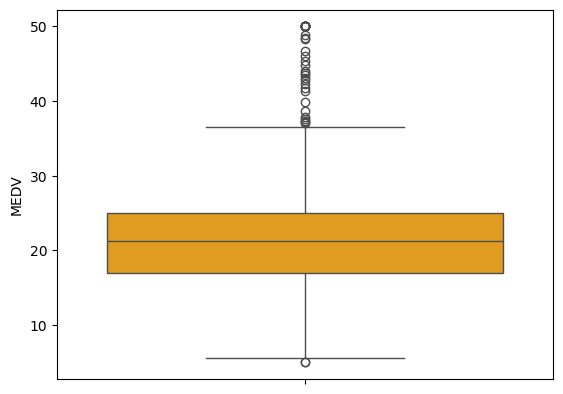

In [7]:
ax = sns.boxplot(y='MEDV', data=boston_df, color='orange')
plt.show()

## Bar Plot for Charles River Variable in Boston Housing Data

The following Python code generates a bar plot to visualize the distribution of the `Charles river` variable in the Boston housing dataset. The `Charles river` variable indicates whether a property is located near the Charles River (1) or not (0). 

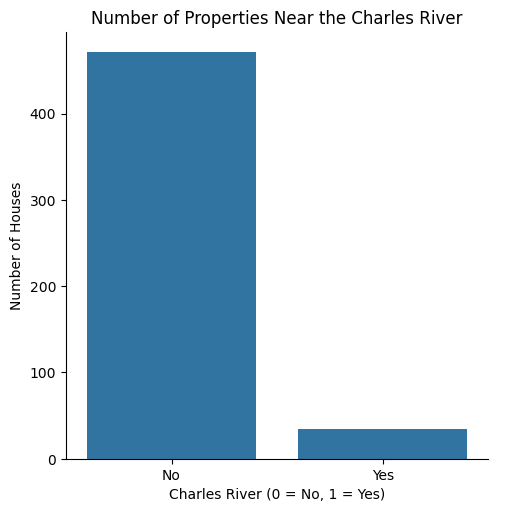

In [8]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Number of Houses')
plt.title('Number of Properties Near the Charles River')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

## Boxplot of MEDV vs AGE Groups

This code snippet demonstrates how to create a boxplot to visualize the distribution of the `MEDV` (Median Value of Owner-Occupied Homes) variable across different age groups in the Boston housing dataset. The `AGE` variable, which represents the proportion of owner-occupied units built prior to 1940, is discretized into three age groups:

1. **35 years and younger**
2. **Between 35 and 70 years**
3. **70 years and older**

In [9]:
def categorize_age(age):
    if age <= 35:
        return '35 years and younger'
    elif age <= 70:
        return 'Between 35 and 70 years'
    else:
        return '70 years and older'

boston_df['AGE_GROUP'] = boston_df['AGE'].apply(categorize_age)

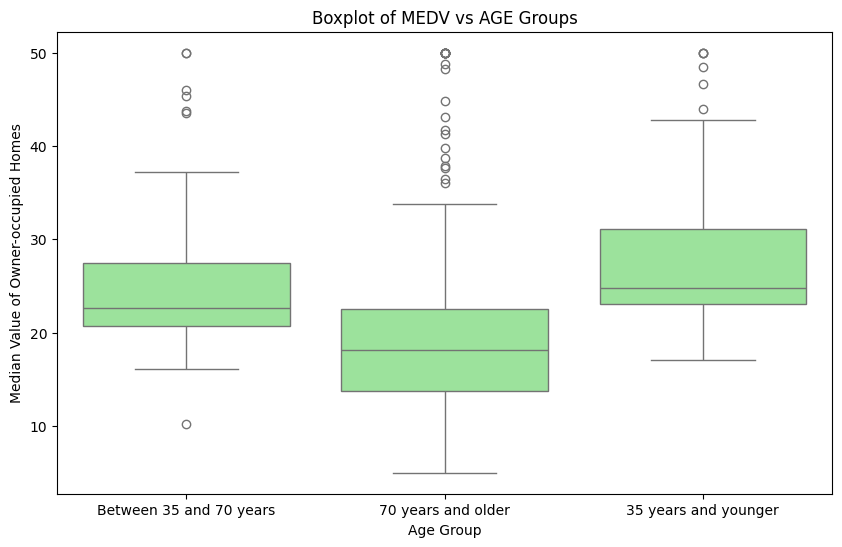

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, color='lightgreen')
plt.title('Boxplot of MEDV vs AGE Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-occupied Homes')
plt.show()

## Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres per Town

### Objective:
To visualize the relationship between Nitric oxide concentrations (`NOX`) and the proportion of non-retail business acres per town (`INDUS`) using the Boston Housing dataset.

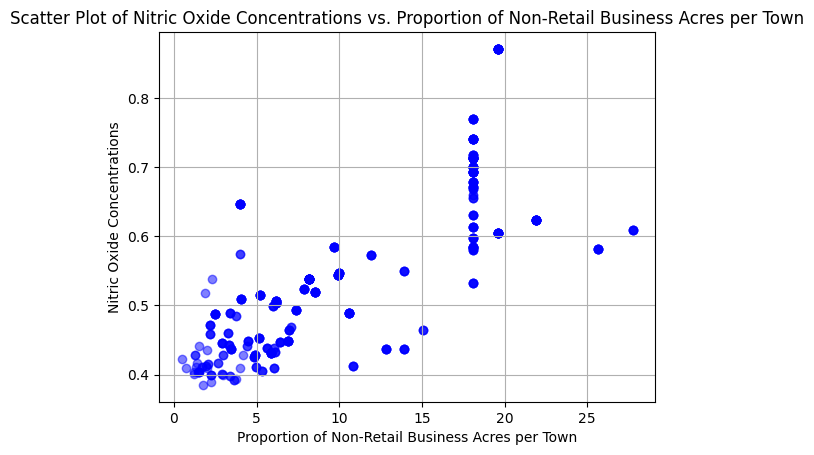

In [11]:
plt.scatter(boston_df['INDUS'], boston_df['NOX'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres per Town')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentrations')
plt.grid(True)
plt.show()

From the scatter plot, it can be observed that there is a positive relationship between Nitric oxide concentrations (`NOX`) and the proportion of non-retail business acres per town (`INDUS`). As the proportion of non-retail business acres increases, the concentration of Nitric oxide tends to increase as well. This suggests that areas with more industrial land use may have higher levels of Nitric oxide pollution, which is consistent with the expectation that industrial activities contribute to air pollution.

## Creating a Histogram for the Pupil-to-Teacher Ratio in the Boston Housing Data

This code snippet demonstrates how to create a histogram for the `pupil-teacher ratio` variable (often denoted as `PTRATIO`) from the Boston housing dataset using Python's `matplotlib` and `seaborn` libraries.

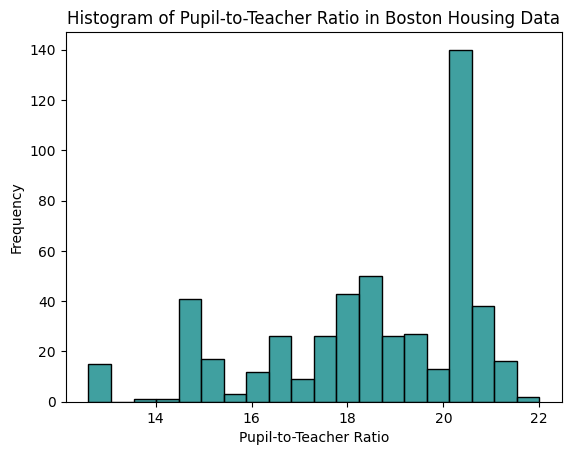

In [12]:
sns.histplot(boston_df['PTRATIO'], kde=False, bins=20, color='teal')

plt.title('Histogram of Pupil-to-Teacher Ratio in Boston Housing Data')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')

plt.show()

# Task 3. Use the appropriate tests to answer the questions provided

## Question 1.

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:

Null Hypothesis (H₀): There is no significant difference in the median value of houses bounded by the Charles river (CHAS = 1) or not (CHAS = 0).

Alternative Hypothesis (H₁): There is a significant difference in the median value of houses bounded by the Charles river or not.

In [13]:
X = boston_df['CHAS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           7.39e-05
Time:                        19:17:14   Log-Likelihood:                -1832.3
No. Observations:                 506   AIC:                             3669.
Df Residuals:                     504   BIC:                             3677.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0938      0.418     52.902      0.000      21.273      22.914
CHAS           6.3462      1.588      3.996      0.000       3.226       9.466
==============================================================================
Omnibus:                       81.923   Durbin-Watson:                   0.579
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.534
Skew:                           1.043   Prob(JB):                     5.50e-28
Kurtosis:                       4.267   Cond. No.                         3.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [15]:
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In [16]:
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in the median value of houses bounded by the Charles River.")

We reject the null hypothesis. There is a significant difference in the median value of houses bounded by the Charles River.


## Question 2

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:

Null Hypothesis (H₀): There is no difference in median values of houses for each proportion of owner-occupied units built prior to 1940.

Alternative Hypothesis (H₁): There is a difference in median values of houses for each proportion of owner-occupied units built prior to 1940.

In [17]:
boston_df.loc[(boston_df['AGE'] <= 40), 'age_group'] = '40 years and younger'
boston_df.loc[(boston_df['AGE'] > 40) & (boston_df['AGE'] < 57), 'age_group'] = 'between 40 and 57 years'
boston_df.loc[(boston_df['AGE'] >= 57), 'age_group'] = '57 years and older'

lm = ols('MEDV ~ age_group', data=boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq          F        PR(>F)
age_group    2.0   4363.537644  2181.768822  28.614102  1.700429e-12
Residual   503.0  38352.757771    76.248027        NaN           NaN


In [18]:
forty_lower = boston_df[boston_df['age_group'] == '40 years and younger']['MEDV']
forty_fiftyseven = boston_df[boston_df['age_group'] == 'between 40 and 57 years']['MEDV']
fiftyseven_older = boston_df[boston_df['age_group'] == '57 years and older']['MEDV']

In [19]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 28.614101859178227, P-Value: 1.7004292934854466e-12


Since the p-value is significantly less than the alpha level of 0.05, we reject the null hypothesis. This means there is a statistically significant difference in the median values of houses (MEDV) for the different age groups of homes (40 years and younger, between 40 and 57 years, and 57 years and older).

## Question 3

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:

Null Hypothesis (H₀): There is no relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

Alternative Hypothesis (H₁): There is a relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.

In [20]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [21]:
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.")

Reject the null hypothesis: There is a significant relationship between nitric oxide concentrations and the proportion of non-retail business acres per town.


## Question 4

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Hypothesis:

Null Hypothesis (H₀): The weighted distance to Boston employment centres has no impact on the median value of owner-occupied homes.

Alternative Hypothesis (H₁): The weighted distance to Boston employment centres has an impact on the median value of owner-occupied homes.

In [22]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 15 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        19:17:20   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
p_value = model.pvalues['DIS']
if p_value < alpha:
    print("Reject the null hypothesis: The weighted distance to Boston employment centres has a significant impact on the median value of owner-occupied homes.")
else:
    print("Fail to reject the null hypothesis: The weighted distance to Boston employment centres has no significant impact on the median value of owner-occupied homes.")

Reject the null hypothesis: The weighted distance to Boston employment centres has a significant impact on the median value of owner-occupied homes.
